In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Sequential
import tensorflow.keras as keras

from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dense,Dropout,BatchNormalization,Activation


In [2]:
df=pd.read_csv('yeni.csv')
df

,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9,CM10,...,H_ici,H_sonu,Sabah,Ogle,Aksam,Diger_Vakitler,Meslek,Beklenen_Sure,Gerceklesen_Sure,Durum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,954.198112,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,851.0,1017.113566,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,877.329707,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,666.0,738.715326,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,923.665706,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,7.0,916.0,1032.644287,1.0
476516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,7.0,343.0,288.267355,1.0
476517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,7.0,512.0,485.547595,1.0
476518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,7.0,835.0,798.048932,1.0


In [3]:
#df.drop('Unnamed: 0',axis=1,inplace=True)
#df

In [4]:
df["Meslek"].unique()

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [5]:
df["Durum"].unique()

array([0., 1.])

In [6]:
X = df.drop(columns=['Durum'])
Y = df[['Durum']]

In [7]:
X

,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9,CM10,...,CM124,H_ici,H_sonu,Sabah,Ogle,Aksam,Diger_Vakitler,Meslek,Beklenen_Sure,Gerceklesen_Sure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,954.198112
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,851.0,1017.113566
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,877.329707
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,666.0,738.715326
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,923.665706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,916.0,1032.644287
476516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,343.0,288.267355
476517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,512.0,485.547595
476518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,835.0,798.048932


In [8]:
Y

,Durum
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
476515,1.0
476516,1.0
476517,1.0
476518,1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(357390, 133) (357390, 1)
(119130, 133) (119130, 1)


In [10]:
y_test

,Durum
237383,0.0
221599,0.0
396030,1.0
473588,1.0
348995,1.0
...,...
153982,0.0
296767,1.0
278865,1.0
468907,1.0


In [11]:
encoder=LabelEncoder()

In [12]:
y1=encoder.fit_transform(Y)

In [13]:
y=pd.get_dummies(y1).values
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(357390, 133) (357390, 2)
(119130, 133) (119130, 2)


In [15]:
#y_train = tf.keras.utils.to_categorical(y_train, 8)
#y_test= tf.keras.utils.to_categorical(y_test,8)
#y_train[0]

In [16]:
y_test[0]

array([1, 0], dtype=uint8)

In [17]:
y_train = np.array(y_train).astype(int)
X_train = np.array(X_train).astype(float)
y_test = np.array(y_test).astype(int)
X_test = np.array(X_test).astype(float)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler= StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)


X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
#X_train_scaled

In [21]:

y_test

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [22]:
X_test[0]


array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [23]:
model = Sequential()

input_dim = X_train.shape[1]  # Öznitelik Sayısı
num_classes = 2 # Sınıf sayısı


#add model layers

model.add(Dense(64,  input_dim=input_dim))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='sigmoid'))
lr = .001
adam0 = Adam(lr = lr)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8576      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                2

In [24]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [25]:
history =model.fit(X_train_scaled,
                   y_train,
                   batch_size=64, 
                   verbose=1,
                   epochs=20)


Epoch 1/20
5585/5585 [==============================] - 20s 2ms/step - loss: 0.4928 - accuracy: 0.7483
Epoch 2/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1860 - accuracy: 0.9258
Epoch 3/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1585 - accuracy: 0.9381
Epoch 4/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1509 - accuracy: 0.9419
Epoch 5/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1461 - accuracy: 0.9430
Epoch 6/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1403 - accuracy: 0.9458
Epoch 7/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1414 - accuracy: 0.9456
Epoch 8/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1374 - accuracy: 0.9470
Epoch 9/20
5585/5585 [==============================] - 12s 2ms/step - loss: 0.1354 - accuracy: 0.9477
Epoch 10/20
5585/5585 [==============================] - 12s 2ms/step - l

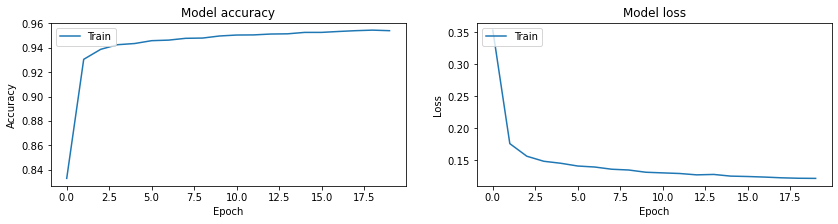

In [26]:
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('Accuracy&loss.png')
plt.show()

In [27]:
scores=model.evaluate(X_test_scaled,y_test, verbose=1)

3723/3723 [==============================] - 3s 770us/step - loss: 0.0817 - accuracy: 0.9641


In [28]:
model.save_weights('durum2.h5')

In [29]:
#model.load_weights('meslek.h5')

In [30]:
tahmin1=model.predict(X_test[0].reshape(1,133))


In [31]:
print("Tahmin sonucu:", tahmin1)

Tahmin sonucu: [[1. 0.]]


In [32]:
print("Gerçek sonucu:", y_test[0])

Gerçek sonucu: [1 0]


In [54]:
tahmin2=model.predict(X_test[90].reshape(1,133))

In [55]:
print("Tahmin sonucu:", tahmin2)

Tahmin sonucu: [[0. 1.]]


In [56]:
print("Gerçek sonucu:", y_test[90])

Gerçek sonucu: [0 1]


In [36]:
tahmin3=model.predict(X_test[100].reshape(1,133))

In [37]:
print("Tahmin sonucu:", tahmin3)

Tahmin sonucu: [[0. 1.]]


In [38]:
print("Gerçek sonucu:", y_test[100])

Gerçek sonucu: [0 1]


In [39]:
tahmin4=model.predict(X_test[1000].reshape(1,133))

In [40]:
print("Tahmin sonucu:", tahmin4)

Tahmin sonucu: [[1. 0.]]


In [41]:
print("Gerçek sonucu:", y_test[1000])

Gerçek sonucu: [1 0]


In [57]:
tahmin4=model.predict(X_test[90000].reshape(1,133))

In [58]:
print("Tahmin sonucu:", tahmin4)

Tahmin sonucu: [[0. 1.]]


In [59]:
print("Gerçek sonucu:", y_test[90000])

Gerçek sonucu: [1 0]


In [45]:
tahmin5=model.predict(X_test[20000].reshape(1,133))

In [46]:
print("Tahmin sonucu:", tahmin5)

Tahmin sonucu: [[0. 1.]]


In [47]:
print("Gerçek sonucu:", y_test[20000])

Gerçek sonucu: [0 1]


In [60]:
tahmin5=model.predict(X_test[36000].reshape(1,133))
print("Tahmin sonucu:", tahmin5)
print("Gerçek sonucu:", y_test[36000])

Tahmin sonucu: [[0. 1.]]
Gerçek sonucu: [0 1]


In [49]:
tahmin6=model.predict(X_test[40000].reshape(1,133))
print("Tahmin sonucu:", tahmin6)
print("Gerçek sonucu:", y_test[40000])

Tahmin sonucu: [[0. 1.]]
Gerçek sonucu: [0 1]


In [50]:
tahmin7=model.predict(X_test[50000].reshape(1,133))
print("Tahmin sonucu:", tahmin7)
print("Gerçek sonucu:", y_test[50000])

Tahmin sonucu: [[0. 1.]]
Gerçek sonucu: [0 1]


In [61]:
tahmin8=model.predict(X_test[55500].reshape(1,133))
print("Tahmin sonucu:", tahmin8)
print("Gerçek sonucu:", y_test[55500])

Tahmin sonucu: [[1. 0.]]
Gerçek sonucu: [1 0]


In [52]:
tahmin9=model.predict(X_test[70000].reshape(1,133))
print("Tahmin sonucu:", tahmin9)
print("Gerçek sonucu:", y_test[70000])

Tahmin sonucu: [[1. 0.]]
Gerçek sonucu: [1 0]


In [53]:
tahmin10=model.predict(X_test[76000].reshape(1,133))
print("Tahmin sonucu:", tahmin10)
print("Gerçek sonucu:", y_test[76000])

Tahmin sonucu: [[0. 1.]]
Gerçek sonucu: [1 0]
